# 1. CARGAR LIBRERÍAS 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import missingno as msno
import statsmodels.api as sm
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_percentage_error

# 2. CARGAR EL DATAFRAME

## 2.1 CREAR EL DATAFRAME CON PANDAS

In [2]:
df_sin_limpiar = pd.read_csv("C:\\Users\\ingen\\OneDrive\\Escritorio\\CURSO DE DATA SCIENCE\\cathycaz-intro-ml\\data\\raw\\internal-link (2).csv")
# CON ESTE CÓDIGO SE IMPORTA EL DOCUMENTO CON FORMATO CSV
df_sin_limpiar.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 2.2 INFORMACIÓN DEL DTAFRAME

In [3]:
df_sin_limpiar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# 3. CRIBADO MANUAL

## 3.1 OBJETIVO A ESTUDIAR

In [4]:
"""La importante compañía de seguros 4Geeks Insurance S.L. quiere calcular, 
en función de los datos fisiológicos de sus clientes, cuál va a ser la prima (coste) 
que debe asumir cada uno de ellos. Para ello, ha reunido a un equipo completo de médicos 
y en función de datos de otras compañías y un estudio particular han logrado reunir un conjunto 
de datos para entrenar un modelo predictivo."""

'La importante compañía de seguros 4Geeks Insurance S.L. quiere calcular, \nen función de los datos fisiológicos de sus clientes, cuál va a ser la prima (coste) \nque debe asumir cada uno de ellos. Para ello, ha reunido a un equipo completo de médicos \ny en función de datos de otras compañías y un estudio particular han logrado reunir un conjunto \nde datos para entrenar un modelo predictivo.'

## 3.2 CREAR UNA COPIA DEL DATAFRAME ORIGINAL PARA TRABAJAR SOBRE ESTE

In [5]:
df= df_sin_limpiar.copy() 
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 3.3 COMPROBACIÓN DE VALORES ÚNICOS

In [6]:
unicos = df.nunique()
unicos

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

## 3.4 COMPROBACIÓN DE VALORES ÚNICOS IGUAL A 1

In [7]:
df[unicos[unicos==1].index]

""
0
1
2
3
4
...
1333
1334
1335
1336


CONCLUSIÓN: NO HAY VALORES ùNICOS IGUAL A 1

## 3.5 COMPROBACIÓN DE DATOS DUPLICADOS EN FILAS 

In [8]:
df.duplicated().sum()

np.int64(1)

### 3.5.1 VISUALIZAR LAS FILAS DUPLICADAS

In [9]:
# keep=False muestra TODAS las ocurrencias (incluyendo la original)
filas_duplicadas = df[df.duplicated(keep=False)]

if len(filas_duplicadas) > 0:
    print(f"⚠️ Se encontraron {len(filas_duplicadas)} filas duplicadas:")
    print(f"Esto representa {len(filas_duplicadas)/len(df)*100:.2f}% del dataset\n")
    print(filas_duplicadas)
else:
    print("✅ No hay filas duplicadas en el dataset")

⚠️ Se encontraron 2 filas duplicadas:
Esto representa 0.15% del dataset

     age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631
581   19  male  30.59         0     no  northwest  1639.5631


## 3.6 ELIMINAR DATOS DUPLICADOS EN FILAS

In [10]:
df.drop_duplicates(keep='first', inplace=True)
df.duplicated().sum()

np.int64(0)

CONCLUSIÓN: YA NO TENEMOS DATOS DUPLICADOS EN FILAS

## 3.7 COMPROBACIÓN DE DATOS DUPLICADOS EN COLUMNAS 

In [11]:
df.T.duplicated().sum()

np.int64(0)

CONCLUSIÓN: NO HAY DATOS DUPLICADOS EN COLUMNAS

## 3.8 VERIFICACIÓN DE DATOS FALTANTES EN COLUMNAS

In [12]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
df.isnull().mean()*100

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

## 3.9 ESTUDIAMOS A FONDO SI REALMENTE NO HAY DATOS FALTANTES!!

### 3.9.1 VISUALIZAR COLUMNAS CON VALORES DE TIPO OBJECT

In [14]:
df.select_dtypes(include='object')

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


### 3.9.2 ANÁLISIS DETALLADO DE CADA COLUMNA DE TEXTO PARA ENCONTRAR POSIBLES VALORES ENMASCARADOS

In [15]:
# Ahora vamos a ver que valores únicos tiene cada columna de texto. Esto nos ayudará a identificar valores sospechosos.
for columna in df.select_dtypes(include='object').columns: # → Recorre todas las columnas de texto
    print(f"\n{'-'*25}")
    print(f"COLUMNA: {columna}")
    print(f"{'-'*25}")
    print(df[columna].value_counts()) # Muestra cada valor único y cuántas veces aparece, ordenado de mayor a menor frecuencia
    print(f"\nTotal de valores únicos: {df[columna].nunique()}") # → Cuenta cuántos valores diferentes hay en total


-------------------------
COLUMNA: sex
-------------------------
sex
male      675
female    662
Name: count, dtype: int64

Total de valores únicos: 2

-------------------------
COLUMNA: smoker
-------------------------
smoker
no     1063
yes     274
Name: count, dtype: int64

Total de valores únicos: 2

-------------------------
COLUMNA: region
-------------------------
region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

Total de valores únicos: 4


CONCLUSIÓN: NO HAY VALORES FALTANTES ENMASCARADOS

## 3.10 GRÁFICA DE VALORES FALTANTES (AUNQUE YA SABEMOS QUE NO HAY DATOS FALTANTES)

<Axes: >

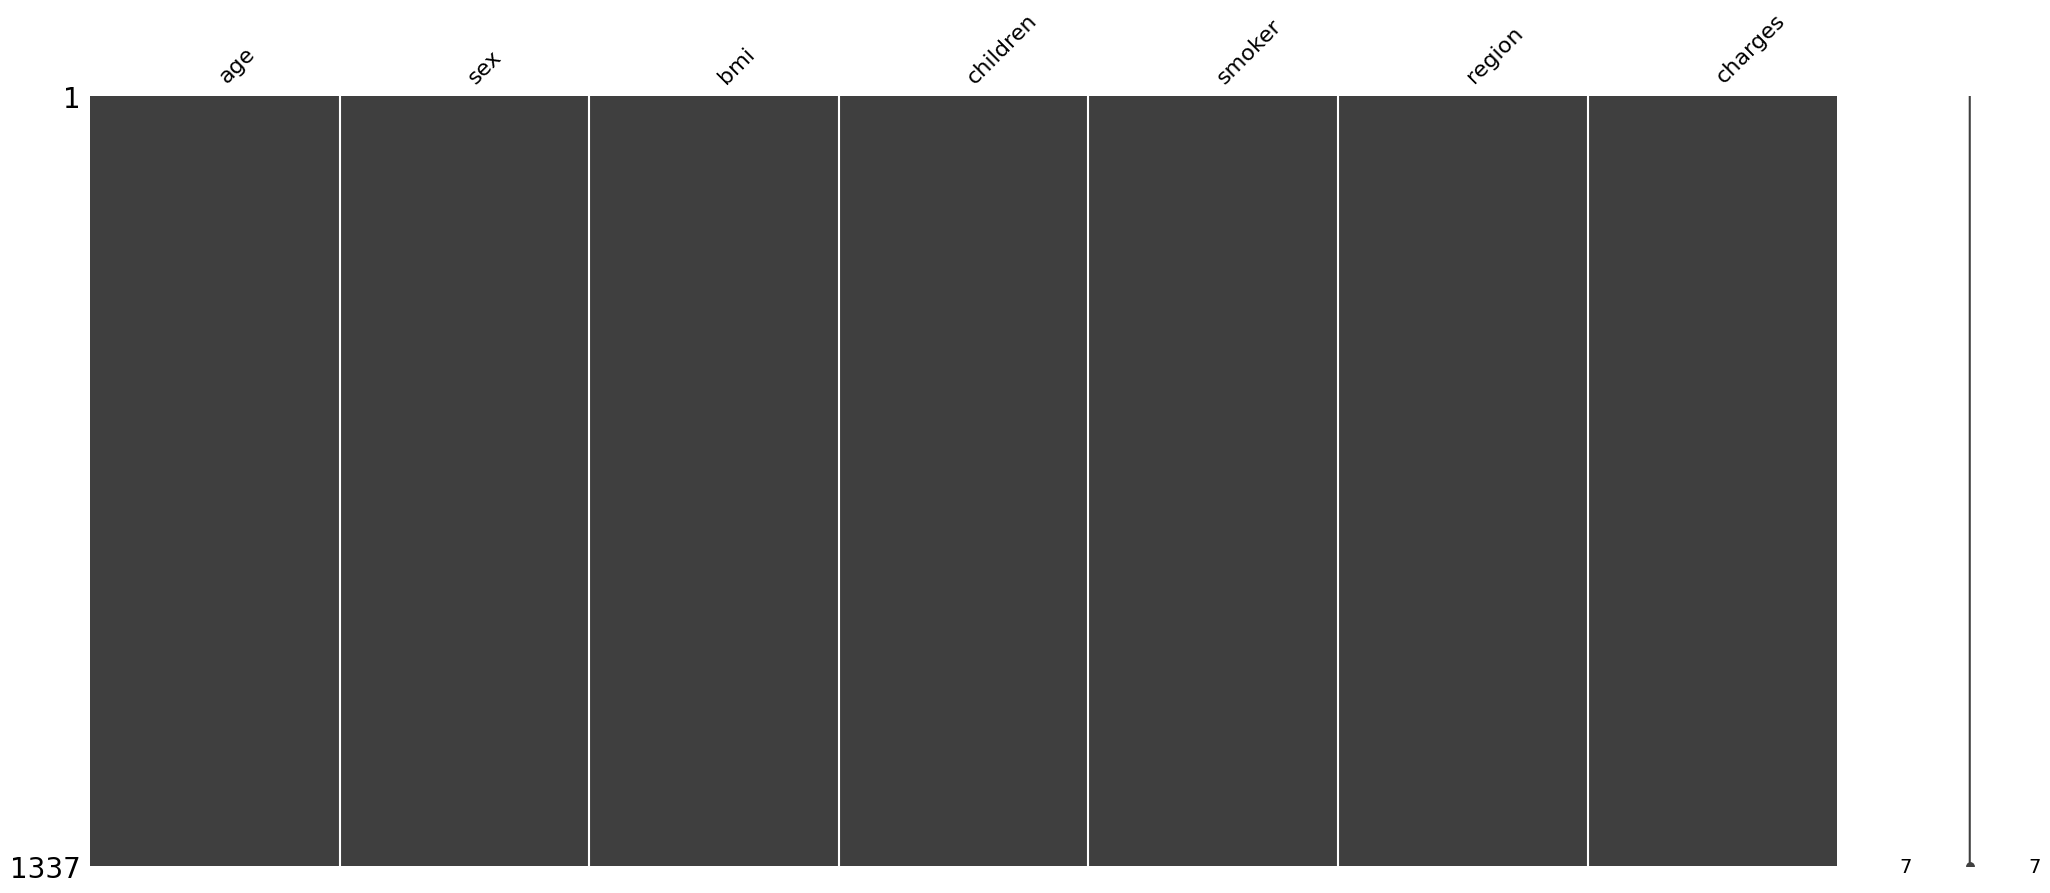

In [16]:
msno.matrix(df)

## 3.11 VERIFICAR DATOS FALTANTES EN FILAS MAYORES AL 40% 

In [17]:
df_filas_faltantes = (df.T.isnull().sum()* 100 / len(df)).round(2)
df_filas_faltantes.sum()

np.float64(0.0)

CONCLUSIÓN: (EN ESTE CASO NO APLICA) POR LÓGICA NO HAY FILAS FALTANTES CON DATOS MAYORES A 40%

# 4. CATEGORIZACIÓN DE VARIABLES 

## 4.1 APLICAMOS EL MÉTODO 'One-Hot Encoding' 

In [18]:
columns = df.select_dtypes(include=['object', 'category']).columns.tolist() # Selecciona las columnas categóricas
df_dummies = pd.get_dummies(df[columns], drop_first=True, dtype=int) # Crea variables dummy y convierte a int,  con drop_first para evitar la multicolinealidad
num_cols = df.select_dtypes(exclude=['object', 'category']) # Selecciona las columnas numéricas
df= pd.concat([df_dummies,num_cols],axis=1) # Concatena las variables dummy con las numéricas para formar el nuevo DataFrame

In [19]:
df.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age,bmi,children,charges
0,0,1,0,0,1,19,27.900,0,16884.92400
1,1,0,0,1,0,18,33.770,1,1725.55230
2,1,0,0,1,0,28,33.000,3,4449.46200
3,1,0,1,0,0,33,22.705,0,21984.47061
4,1,0,1,0,0,32,28.880,0,3866.85520


# 5. VERIFICAR SI EL MODELO SIGUE UNA REGRESION LINEAL 

## 5.1 GRÁFICA LINEAL 

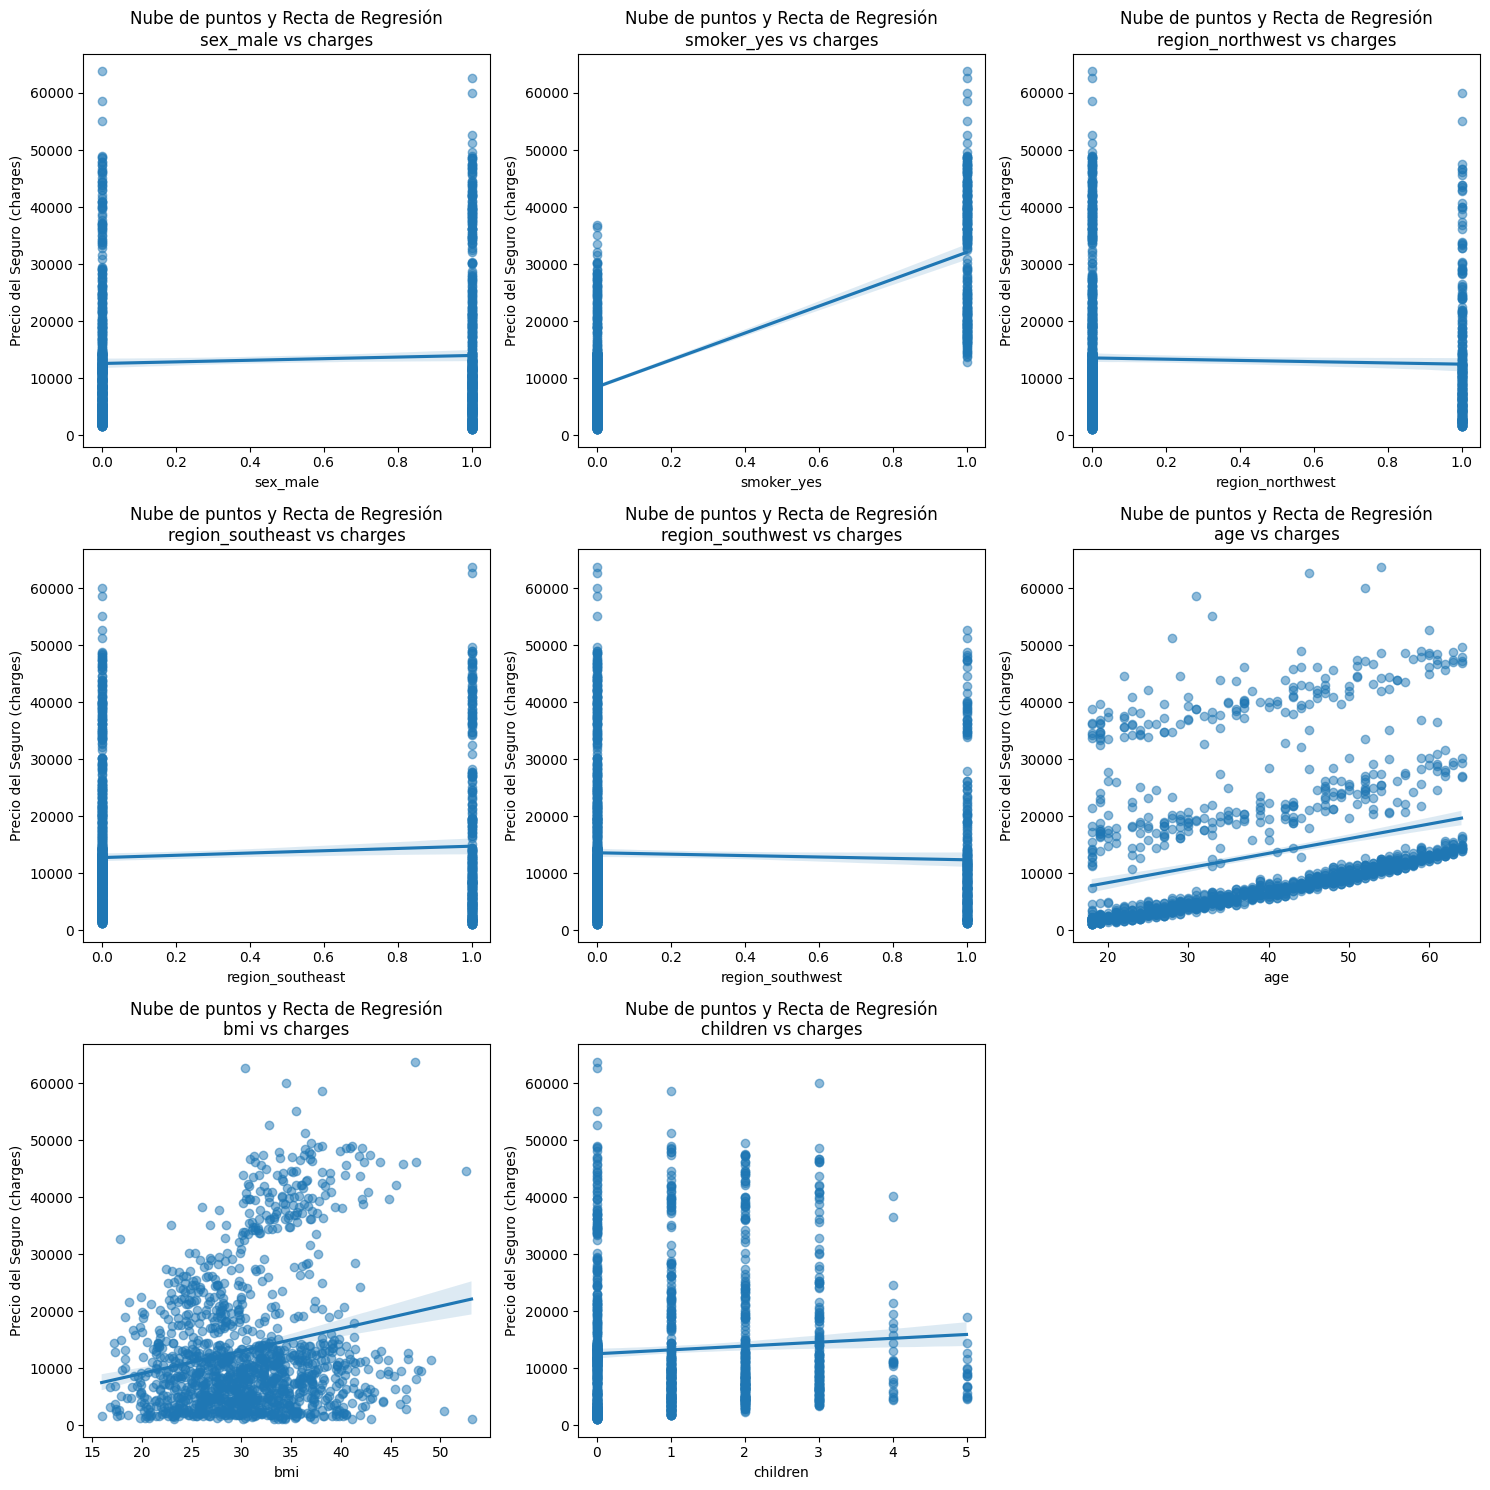

In [20]:
# Ver todas las relaciones a la vez con línea de regresión
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remover 'charges' de la lista si está presente
columnas_para_graficar = [col for col in columnas_numericas if col != 'charges']

# Calcular el número de filas y columnas necesarias
num_graficos = len(columnas_para_graficar)
num_cols = 3  # 3 gráficos por fila
num_rows = (num_graficos + num_cols - 1) // num_cols  # Redondear hacia arriba

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(columnas_para_graficar):
    # Usar regplot de seaborn para mostrar nube de puntos + línea de regresión
    sns.regplot(x=col, y='charges', data=df, ax=axes[i], scatter_kws={'alpha':0.5})
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Precio del Seguro (charges)')
    axes[i].set_title(f'Nube de puntos y Recta de Regresión\n{col} vs charges')

# Ocultar subplots vacíos si los hay
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

## 5.2 DETECTAR VALORES ATIPICOS OUTLIERS

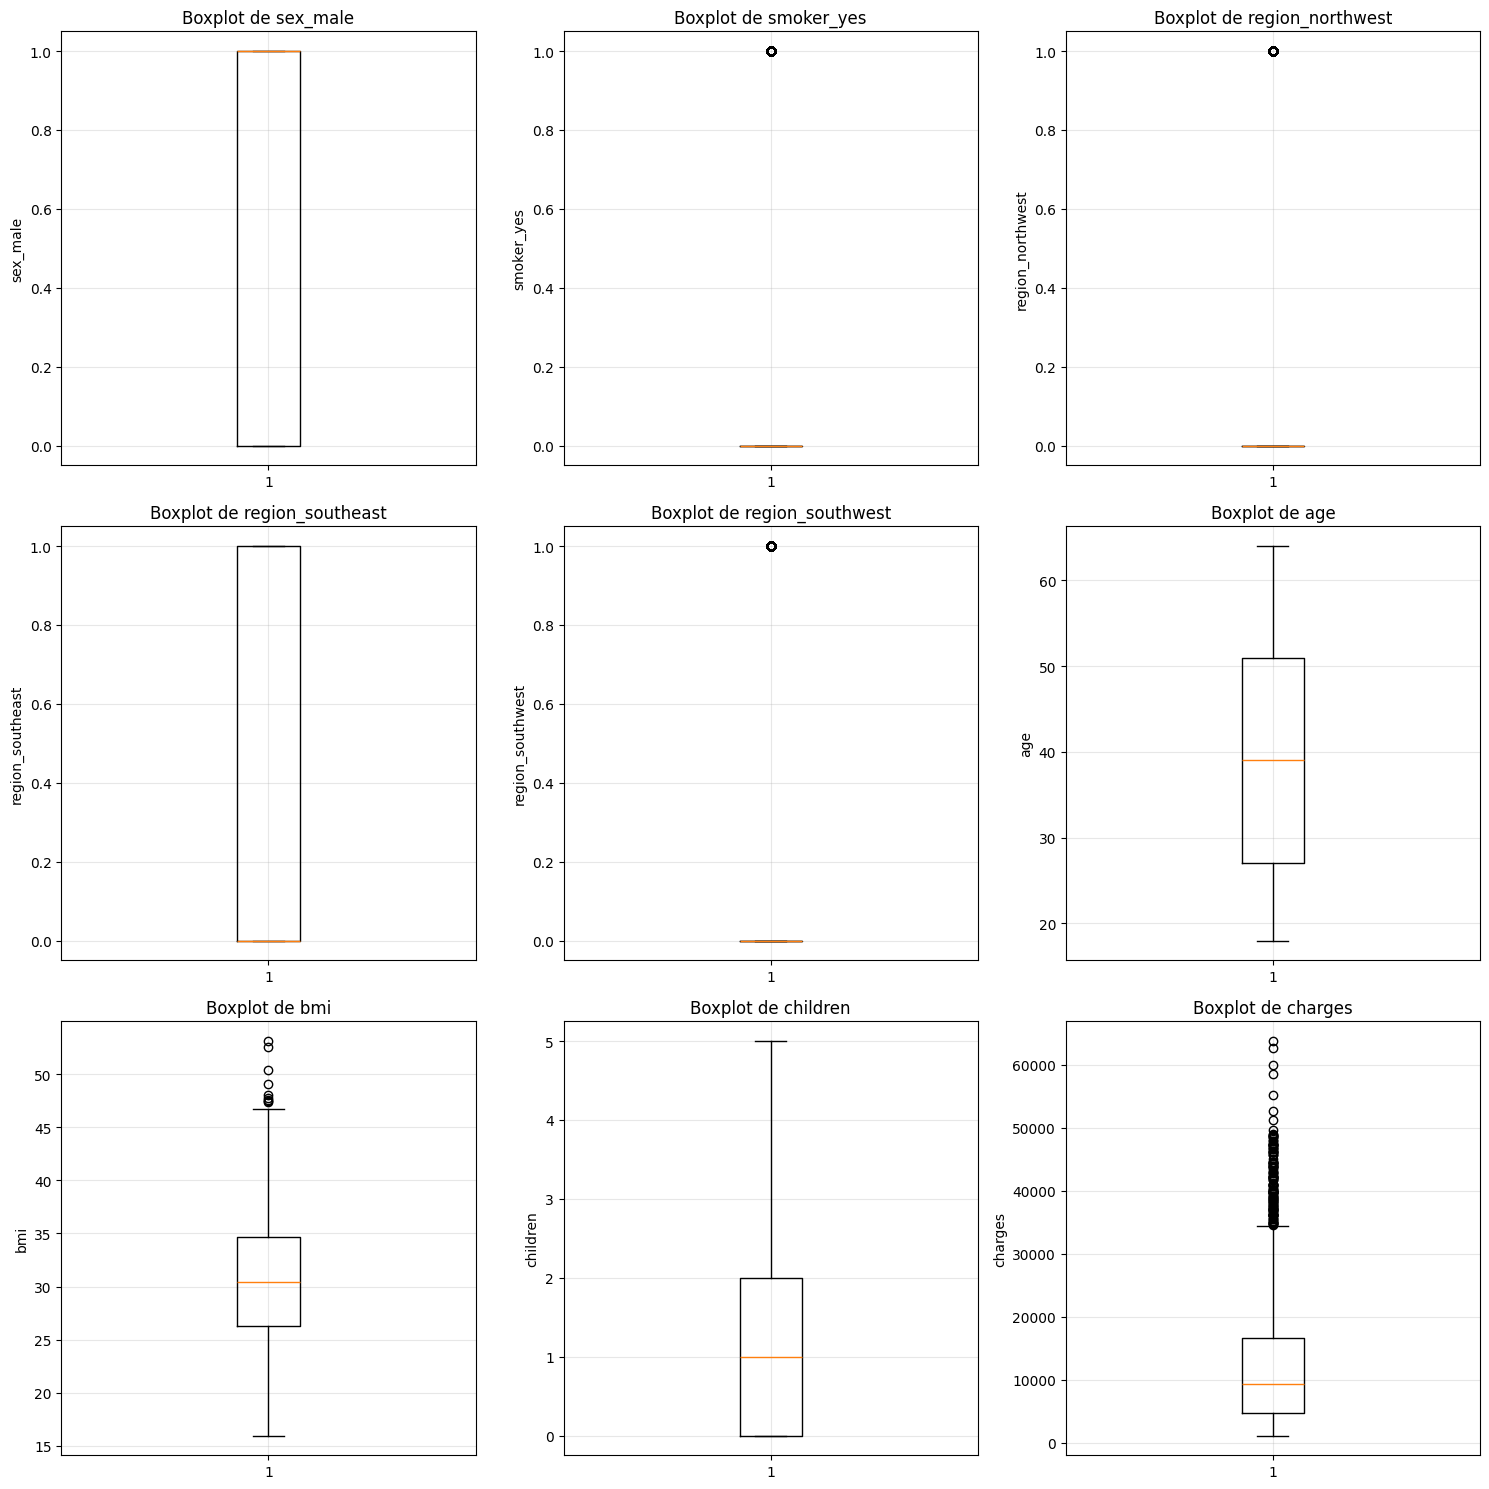


📊 Se analizaron 9 columnas numéricas: sex_male, smoker_yes, region_northwest, region_southeast, region_southwest, age, bmi, children, charges


In [21]:
# Ver outliers en TODAS las columnas numéricas automáticamente
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Calcular cuántos gráficos necesitamos
num_columnas_grafico = len(columnas_numericas)
num_cols = 3  # 3 boxplots por fila
num_rows = (num_columnas_grafico + num_cols - 1) // num_cols

# Crear los subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Crear un boxplot para cada columna
for i, col in enumerate(columnas_numericas):
    axes[i].boxplot(df[col])
    axes[i].set_title(f'Boxplot de {col}')
    axes[i].set_ylabel(col)
    axes[i].grid(True, alpha=0.3)

# Ocultar subplots vacíos si los hay
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

print(f"\n📊 Se analizaron {num_columnas_grafico} columnas numéricas: {', '.join(columnas_numericas)}")

# 6. APLICAR EL TRAIN TEST SPLIT 

## 6.1 SEPARAR LA VARIABLE OBJETIVO DEL DATAFRAME

In [22]:
X = df.drop('charges', axis=1)  # Características: todas las columnas excepto 'charges'
y = df['charges']  # Variable objetivo: la prima que queremos predecir

## 6.2 SEPARAR EL DATAFRAME EN ENTRENAMIENTO (80%) Y PRUEBA (20%)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Mostrar las dimensiones de los conjuntos resultantes

In [24]:
print(f"Dimensiones del conjunto de entrenamiento: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Dimensiones del conjunto de testeo: X_test: {X_test.shape}), y_test: {y_test.shape}")

Dimensiones del conjunto de entrenamiento: X_train: (1069, 8), y_train: (1069,)
Dimensiones del conjunto de testeo: X_test: (268, 8)), y_test: (268,)


# 7. APLICAR EL MODELO DE REGRESIÓN LINEAL

## 7.1 VERIFICAR SI EL MÉTODO REGRESIÓN LINEAL VA A FUNCIONAR ANTES DE APLICARLO (AQUI METEMOS TODA LA DATA)

In [25]:
X = sm.add_constant(X) # Agrega una constante (de puros números 1) al modelo
model = sm.OLS(y, X) #  Crea la "máquina" que va a aprender de tus datos.

# Aprenda de los datos fit
results = model.fit() # Aquí la "máquina" APRENDE mirando tus datos.

In [26]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.0
Date:                Fri, 21 Nov 2025   Prob (F-statistic):               0.00
Time:                        16:32:45   Log-Likelihood:                -13538.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1328   BIC:                         2.714e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.194e+04    988.227  

CONCLUSIÓN: CON ESTA TABLA OBTENIDA VERIFICAMOS QUE, DE ACUERDO AL R2, ESTE MODELO PUEDE PREDECIR EL 75 % DE LAS VECES, CON LOS COEFICIENTES VEMOS COMO AFECTA CADA VARIABLE AL PRECIO O LA PREDICCIÓN. Y ESTUDIANDO EL P VALOR DE CADA VARIABLE VEMOS QUE LAS VARIABLES QUE AFCTAN SIGNIFICATIVAMENTE EL PRECIO DE LA PÓLIZA O PREDICCION DEL MISMO SON: SMOKER,, AGE, BMI Y CHILDREN YA QUE TODAS ESTAS ESTAN POR DEBAJO DE 0.05 

## 7.2 GRÁFICO DE RESIDUOS

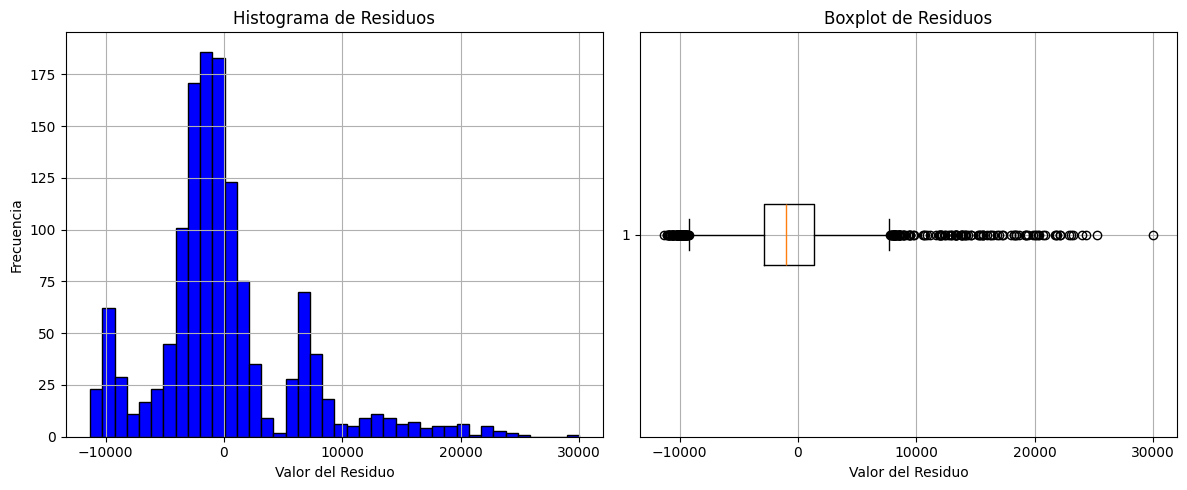

In [27]:
# Crea una figura con dos subgráficos (uno para el histograma y otro para el boxplot)

residuos = results.resid
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Histograma de los residuos en el primer subgráfico (ax1)
ax1.hist(residuos, bins=40, color='blue', edgecolor='black')
ax1.set_title('Histograma de Residuos')
ax1.set_xlabel('Valor del Residuo')
ax1.set_ylabel('Frecuencia')
ax1.grid(True)

# Boxplot de los residuos en el segundo subgráfico (ax2)
ax2.boxplot(residuos, vert=False)
ax2.set_title('Boxplot de Residuos')
ax2.set_xlabel('Valor del Residuo')
ax2.grid(True)

# Muestra la figura con ambos gráficos
plt.tight_layout()  # Ajusta los márgenes para evitar superposiciones
plt.show()

CONCLUSIÓN: DE ACUERDO A LO QUE VEO EL EL GRÁFICO LOS VALORES NO SIGUEN UNA DISTRIBUCION EXACTAMENTE NORMAL, NI LA CAJA ESTA CENTRADA EN EL CERO. PERO PUEDE SER UN RESULTADO ACEPTABLE

## 7.3 ENTRENAMOS EL MODELO (AQUÍ YA SOLO CON EL 80 % DE LA TABLA)

In [28]:
# Entrenamos un modelo de regresión lineal sin regularización
m_linear = LinearRegression().fit(X_train, y_train) # creamos una maquina vacia y la entrenamos solo los datos de entrenamiento

# Realizamos predicciones sobre el conjunto de entrenamiento y de testeo
yhat_train_linear = m_linear.predict(X_train)
yhat_linear = m_linear.predict(X_test)

## 7.4 VISUALIZAMOS PREDICCIONES 

In [29]:
print(yhat_train_linear[0:6])
print(yhat_linear[0:6])

[ 2326.02453297  3289.2193497  14447.83525029 16820.71016479
 10116.72986155 10413.54442316]
[ 8143.69388412  5737.11568259 14369.31487618 31745.51363586
  8962.38665706 13149.72235307]


### 7.4.5 INFORMACION IMPORTANTE 

In [30]:
"""🔍 ¿POR QUÉ NO PODEMOS HACER SOLO UNO?
❌ Si SOLO hacemos sm.OLS() con todos los datos:
✅ Sabemos que el R² es 0.75
❌ PERO NO sabemos si funciona con datos nuevos
❌ El modelo podría estar "memorizando" en lugar de aprendiendo
❌ Si SOLO hacemos LinearRegression() con train-test:
✅ Sabemos que predice datos nuevos
❌ PERO NO sabemos qué variables son importantes (p-valores)
❌ No tenemos análisis estadístico detallado"""

"""✅ RESUMEN:
sm.OLS() (arriba) → "¿Este modelo tiene sentido estadísticamente?"
LinearRegression() (abajo) → "¿Este modelo realmente funciona con clientes nuevos?"
Los DOS son necesarios porque responden preguntas diferentes.
Uno valida la teoría, el otro valida la práctica. 🎓➡️🏆"""

'✅ RESUMEN:\nsm.OLS() (arriba) → "¿Este modelo tiene sentido estadísticamente?"\nLinearRegression() (abajo) → "¿Este modelo realmente funciona con clientes nuevos?"\nLos DOS son necesarios porque responden preguntas diferentes.\nUno valida la teoría, el otro valida la práctica. 🎓➡️🏆'

## 7.5 RELIZAMOS MÉTRICAS

In [31]:
def get_metrics(yhat, y_test, yhat_train, y_train):
  metrics_train = r2_score(y_train, yhat_train), median_absolute_error(y_train, yhat_train), mean_absolute_percentage_error(y_train, yhat_train)*100
  metrics_test = r2_score(y_test, yhat), median_absolute_error(y_test, yhat), mean_absolute_percentage_error(y_test, yhat)*100
  metrics_diff = list(map(lambda x: x[1]-x[0], zip(metrics_train, metrics_test)))
  return pd.DataFrame(data=[metrics_train, metrics_test, metrics_diff], columns=['R2', 'Median AE', 'MAPE'], index=['Train set', 'Test set', 'Diferencia'])

In [32]:
get_metrics(yhat_linear, y_test, yhat_train_linear, y_train)

,R2,Median AE,MAPE
Train set,0.729906,2436.996366,41.920915
Test set,0.806929,2666.194376,41.396756
Diferencia,0.077023,229.198011,-0.524158


# 8. VISUALIZACIÓN DEL MODELO

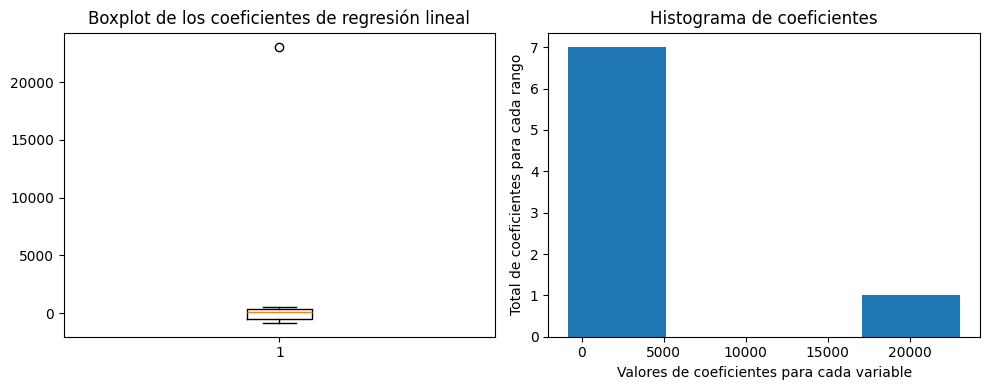

In [33]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(m_linear.coef_)
plt.title('Boxplot de los coeficientes de regresión lineal')
plt.subplot(1, 2, 2)
plt.hist(m_linear.coef_,'sturges')
plt.xlabel('Valores de coeficientes para cada variable')
plt.ylabel('Total de coeficientes para cada rango')
plt.title('Histograma de coeficientes')
plt.tight_layout()
plt.show()

CONCLUSIÓN: EL MODELO ES ACEPTABLE PERO NO PERFECTO, PORQUE AUNQUE EN R2 Y EN MEDIAN AE TENEMOS VALORES EXCELENTES, EN EL MAPE NOS INDICA QUE SE PUEDE EQUIVOCAR EN UN 42% EN EL CALCULO DE LOS PRECIOS.

ESTO PUEDE SUCEDER CON GRAN FRECUENCIA EN EL CASO DE LAS PÓLIZAS DE SEGURO YA QUE LOS PRECIOS VARIAN MUCHO ENTRE PERSONAS JOVENEN Y MAYORES POR ESO EL MAPE SE INFLA MUCHO!!

CONCLUSIÓN DEL GRÁFICO: EN EL BOXPLOT, EL VALOR QUE SE SALE DE LA CAJA CON LOS COEFICIENTE CERCANOS A CERO ES SMOKER YA QUE ES UNA VARIABLE QUE COMO VIMOA AFECTA CONSIDERABLEMENTE EL PRECIO DE LAS PÓLIZAS AL IGUAL QUE EN EL HISTOGRAMA VEMOS QUE  MUCHAS VARIABLES TIENEN EFECTO PEQUEÑO Y ESMOKER TIENE UN EFECTO GIGANTE EN EL PRECIO 

# NOTA ADICIONAL

In [34]:
""" ¿POR QUÉ NO PODEMOS HACER SOLO UNO?
❌ Si SOLO hacemos sm.OLS() con todos los datos:
✅ Sabemos que el R² es 0.75
❌ PERO NO sabemos si funciona con datos nuevos
❌ El modelo podría estar "memorizando" en lugar de aprendiendo
❌ Si SOLO hacemos LinearRegression() con train-test:
✅ Sabemos que predice datos nuevos
❌ PERO NO sabemos qué variables son importantes (p-valores)
❌ No tenemos análisis estadístico detallado

✅ RESUMEN:
sm.OLS() (arriba) → "¿Este modelo tiene sentido estadísticamente?"
LinearRegression() (abajo) → "¿Este modelo realmente funciona con clientes nuevos?"
Los DOS son necesarios porque responden preguntas diferentes. Uno valida la teoría, el otro valida la práctica. 
"""

' ¿POR QUÉ NO PODEMOS HACER SOLO UNO?\n❌ Si SOLO hacemos sm.OLS() con todos los datos:\n✅ Sabemos que el R² es 0.75\n❌ PERO NO sabemos si funciona con datos nuevos\n❌ El modelo podría estar "memorizando" en lugar de aprendiendo\n❌ Si SOLO hacemos LinearRegression() con train-test:\n✅ Sabemos que predice datos nuevos\n❌ PERO NO sabemos qué variables son importantes (p-valores)\n❌ No tenemos análisis estadístico detallado\n\n✅ RESUMEN:\nsm.OLS() (arriba) → "¿Este modelo tiene sentido estadísticamente?"\nLinearRegression() (abajo) → "¿Este modelo realmente funciona con clientes nuevos?"\nLos DOS son necesarios porque responden preguntas diferentes. Uno valida la teoría, el otro valida la práctica. \n'